# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_df = pd.read_csv(
    Path('Resources/whale_navs.csv'),
    index_col="date", 
    parse_dates=True, 
    infer_datetime_format=True
    )
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
daily_returns = whale_df.pct_change().dropna()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Comparison of Daily Returns: SOROS, PAULSON, TIGER, BERKSHIRE vs S&P 500'}, xlabel='date'>

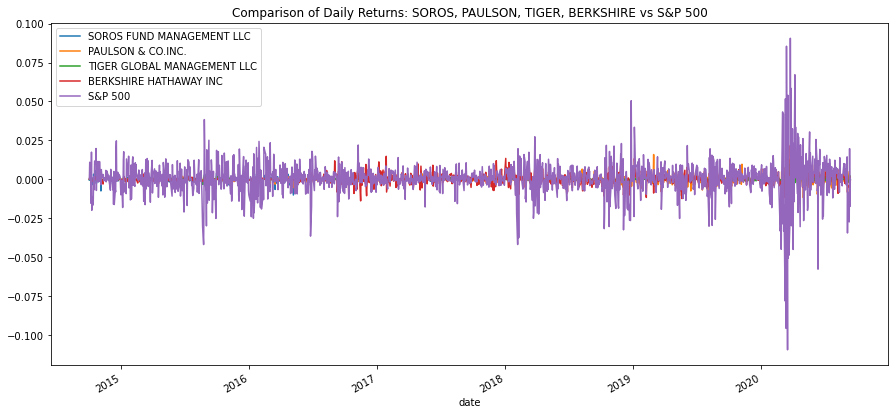

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns.plot(
    figsize=(15,7), 
    title="Comparison of Daily Returns: SOROS, PAULSON, TIGER, BERKSHIRE vs S&P 500"
)

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1+daily_returns).cumprod()
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Comparison of Daily Returns: SOROS, PAULSON, TIGER, BERKSHIRE vs S&P 500'}, xlabel='date'>

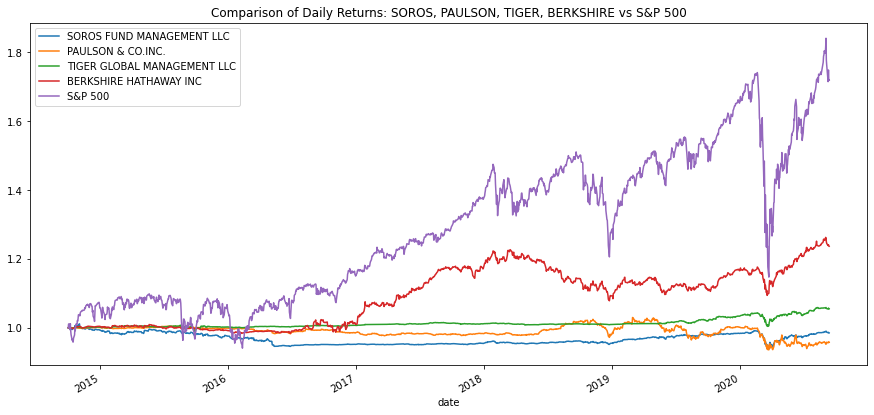

In [6]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(
    figsize=(15,7), 
    title="Comparison of Daily Returns: SOROS, PAULSON, TIGER, BERKSHIRE vs S&P 500"
)

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # 
Over the timeframe spanning from 2014-10-02 to 2020-09-11, the cumulative returns were:

| Fund / Index | Return |
|--------------|--------|
| SOROS FUND MANAGEMENT LLC | 0.985 |
| PAULSON & CO.INC. | 0.958 |
| TIGER GLOBAL MANAGEMENT LLC | 1.055 |
| BERKSHIRE HATHAWAY INC | 1.237 |
| **S&P 500** | **1.719** |

None of the 4 funds outperformed the S&P 500 in the selected timeframe.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Comparitive Distributions of Daily Returns : SOROS, PAULSON, TIGER, BERKSHIRE vs S&P 500'}>

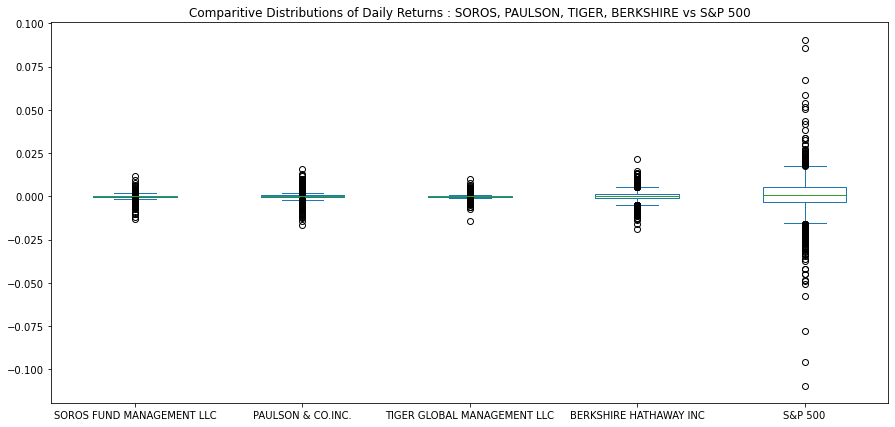

In [7]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot(
    kind='box',
    figsize=(15,7),
    title='Comparitive Distributions of Daily Returns : SOROS, PAULSON, TIGER, BERKSHIRE vs S&P 500'
)


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Descriptive Statistics of Fund Portfolios


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1497.000000,1497.000000,1497.000000,1497.000000
mean,-0.000009,-0.000026,0.000036,0.000147
std,0.001405,0.002199,0.000996,0.003256
min,-0.012910,-0.016720,-0.014563,-0.019076
25%,-0.000381,-0.000534,-0.000193,-0.001082
50%,0.000004,-0.000012,0.000007,0.000027
75%,0.000440,0.000498,0.000240,0.001515
max,0.011505,0.015944,0.010128,0.021761


IQR Comparison of Fund Portfolios


TIGER GLOBAL MANAGEMENT LLC    0.000432
SOROS FUND MANAGEMENT LLC      0.000820
PAULSON & CO.INC.              0.001031
BERKSHIRE HATHAWAY INC         0.002598
dtype: float64

<AxesSubplot:title={'center':'Comparitive Distributions of Daily Returns : SOROS, PAULSON, TIGER, BERKSHIRE'}>

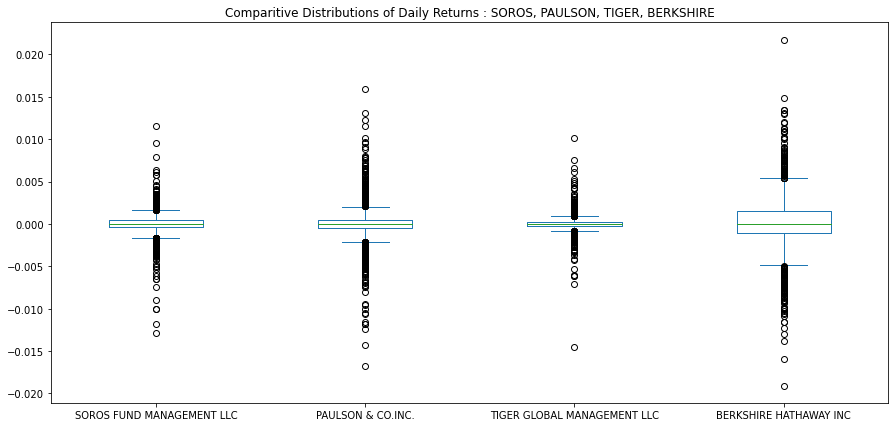

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
fund_daily_returns = daily_returns.drop(columns=['S&P 500'])

# ---- A little extra to experiment with dataframe level calculations
# Compute comparative IQR's
# 1 - create a dataframe for the descriptive stats of the 4 fund portfolios
fund_daily_returns_stats = fund_daily_returns.describe()   
print("Descriptive Statistics of Fund Portfolios")
display(fund_daily_returns_stats)

# 2 - calculate the IQR's using dataframe
funds_iqr = fund_daily_returns_stats.loc['75%',] - fund_daily_returns_stats.loc['25%',]
print("IQR Comparison of Fund Portfolios")
display(funds_iqr.sort_values())

# plot the box plot for the daily returns of the fund portfolios
fund_daily_returns.plot(
    kind='box',
    figsize=(15,7),
    title='Comparitive Distributions of Daily Returns : SOROS, PAULSON, TIGER, BERKSHIRE'
)


#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # 

The *BERKSHIRE HATHAWAY INC* fund has the largest whiskers and the largest interquartile range (IQR) of 0.002598 indicating that it is the **most volatile** of the 4 fund portfolios.

The *TIGER GLOBAL MANAGEMENT LLC* fund has the smallest whiskers and the smallest interquartile range (IQR) of 0.000432 indicating that it is the **least volatile** of the 4 fund portfolios.
 

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [9]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
standard_deviations = daily_returns.std().sort_values()
standard_deviations

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [10]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
trading_days = 252
annualized_standard_deviation = standard_deviations * np.sqrt(trading_days)
annualized_standard_deviation.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Standard Deviation Rolling 21 of SOROS, PAULSON, TIGER, BERKSHIRE and S&P 500'}, xlabel='date'>

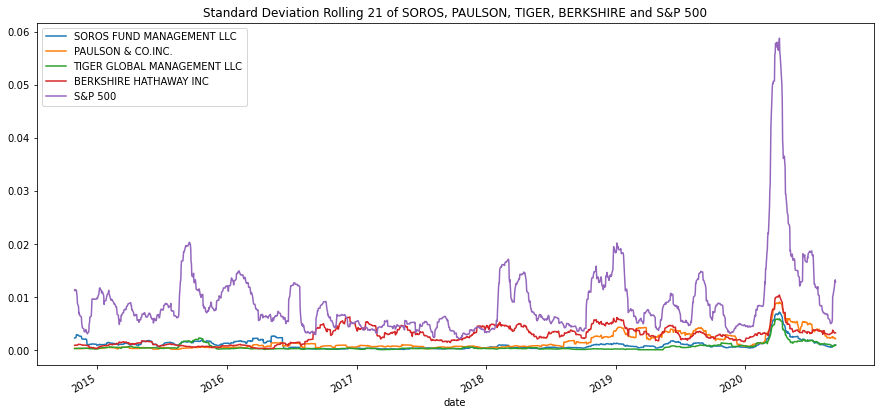

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns.rolling(window=21).std().plot(
    title='Standard Deviation Rolling 21 of SOROS, PAULSON, TIGER, BERKSHIRE and S&P 500',
    figsize=(15,7)
)

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Standard Deviation Rolling 21 of SOROS, PAULSON, TIGER, BERKSHIRE'}, xlabel='date'>

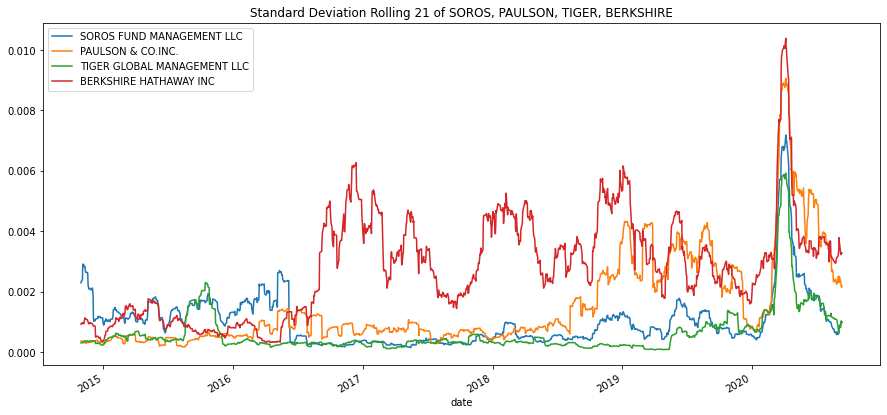

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
fund_daily_returns.rolling(window=21).std().plot(
    title='Standard Deviation Rolling 21 of SOROS, PAULSON, TIGER, BERKSHIRE',
    figsize=(15,7)
)


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** 

The S&P 500 had an annualized standard deviation of 0.183345. None of the other fund portfolios had a standard deviation bigger than 0.183345.  Therefore the S&P 500 posed more risk than the other fund portfolios.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** 

Referring to the plot labeled *Standard Deviation Rolling 21 of SOROS, PAULSON, TIGER, BERKSHIRE and S&P 500*, one can observe that 

* During the period ranging from the beginning of 2015 through most of 2016, the S&P 500 had a high degree of risk whereas the 4 fund portfolios did not. Many spikes in the S&P 500 risk did not correlate with spikes in risk for these 4 fund portfolios.  
* During the period ranging from late 2016 through the end of 2017, the risk of the four fund portfolios seemed to be similar to that of the S&P 500.  
* For the period ranging from the beginning of 2018 through the end of 2020 once again the S&P 500 had a much larger risk profile than the 4 fund portfolios.  On numerous occasions the S&P 500 risk would spike without a similar spike occuring on the 4 fund portfolios.  Although there were a few instances where a spike in the S&P 500 risk would coincide with a smaller spike in one or more the 4 fund portfolios.  

Therefore, it can be observed from this plot that the risk in the 4 fund porfolios does not always increase with increases in risk for the S&P 500.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** 

Referring to the plot labeled *Standard Deviation Rolling 21 of SOROS, PAULSON, TIGER, BERKSHIRE*, one can observe that 

* During the period ranging from the beginning of 2015 through the middle of 2016, the SOROS FUND MANAGEMENT LLC fund portfolio exhibited the highest risk profile.    
* During the period ranging from late 2016 through the beginning of 2019, BERKSHIRE HATHAWAY INC fund portfolio exhibited the highest risk profile. The risk profile of this fund during this period was significantly higher than the other 3 fund portfolios.  
* For the period ranging from the beginning of 2019 through the late in 2019, the BERKSHIRE HATHAWAY INC fund portfolio and the PAULSON & CO.INC. func portfolio had similar high risk profiles that were higher than the other two.    

It can be observed from this plot that the BERKSHIRE HATHAWAY INC fund portfolio exhibited higher risk than the other fund portfolios for a majority of the time frame of the plot.  However, for other periods of the plot, other funds exhibited, such as the SOROS FUND MANAGEMENT LLC fund portfolio early in the plot and the PAULSON & CO.INC. func portfolio late in the plot would at times exhibit more risk than the BERKSHIRE HATHAWAY INC fund portfolio. Therefore, the fund portfolio exhibiting the most risk changed over time.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [13]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
annual_average_returns = daily_returns.mean() * trading_days
annual_average_returns.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratio = annual_average_returns / annualized_standard_deviation
sharpe_ratio_sorted = sharpe_ratio.sort_values()
sharpe_ratio_sorted

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratios : SOROS, PAULSON, TIGER, BERKSHIRE vs S&P 500'}>

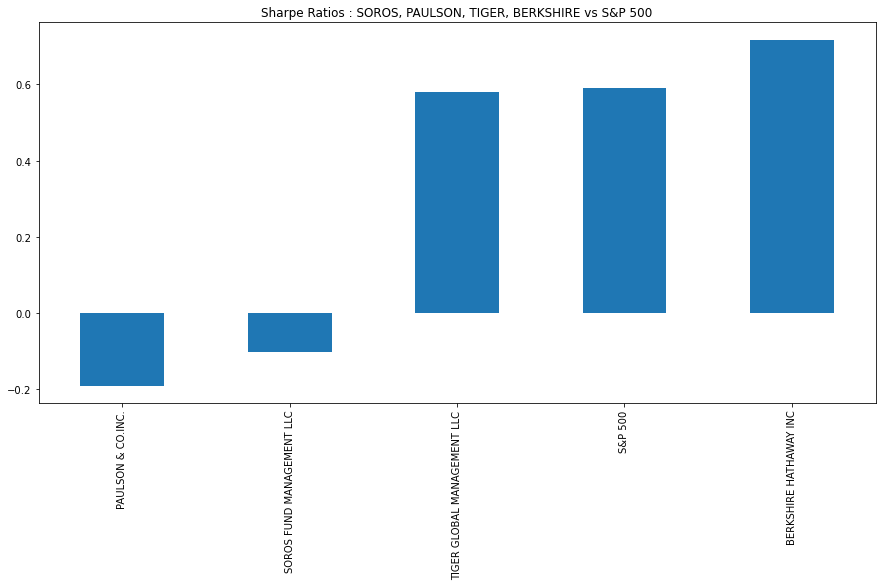

In [15]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratio_sorted.plot(
    kind='bar',
    title='Sharpe Ratios : SOROS, PAULSON, TIGER, BERKSHIRE vs S&P 500',
    figsize=(15,7)
)

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer**

The fund portfolio with the highest Sharpe ratio is the Berkshire Hathaway Inc portfolio.  It has the highest Sharpe ration of 0.717512, indicating that of the set being considered, it has the best risk-return profile.

The fund portfolio with the lowest Sharpe ratio is the Paulson & Co Inc portfolio.  It has the lowest Sharpe ration of -0.189998, indicating that of the set being considered, it has the worst risk-return profile.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [16]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp500_rolling_60_variance = daily_returns['S&P 500'].rolling(window=60).var()
sp500_rolling_60_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [17]:
# select two fund portfolios
portfolio_1 = 'BERKSHIRE HATHAWAY INC'
portfolio_2 = 'TIGER GLOBAL MANAGEMENT LLC'

market = 'S&P 500'
window_size = 60

In [18]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
portfolio_1_rolling_60_covariance = daily_returns[portfolio_1].rolling(window=window_size).cov(daily_returns[market])
display(portfolio_1_rolling_60_covariance.tail())


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [19]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
portfolio_1_beta_rolling_60 = portfolio_1_rolling_60_covariance / sp500_rolling_60_variance
display(portfolio_1_beta_rolling_60.tail())


date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [20]:
# Calculate the average of the 60-day rolling beta
portfolio_1_beta_rolling_60_mean = portfolio_1_beta_rolling_60.mean()
portfolio_1_beta_rolling_60_mean


0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Beta Rolling 60 for BERKSHIRE HATHAWAY INC'}, xlabel='date'>

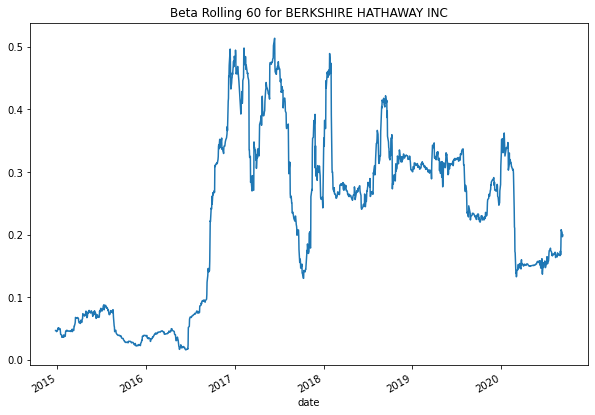

In [21]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
portfolio_1_beta_rolling_60.plot(
    title=f'Beta Rolling 60 for {portfolio_1}',
    figsize=(10,7)
)


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [22]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
portfolio_2_rolling_60_covariance = daily_returns[portfolio_2].rolling(window=window_size).cov(daily_returns[market])
display(portfolio_2_rolling_60_covariance.tail())


date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [23]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
portfolio_2_beta_rolling_60 = portfolio_2_rolling_60_covariance / sp500_rolling_60_variance
display(portfolio_2_beta_rolling_60.tail())


date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [24]:
# Calculate the average of the 60-day rolling beta
portfolio_2_beta_rolling_60_mean = portfolio_2_beta_rolling_60.mean()
portfolio_2_beta_rolling_60_mean


0.03093001487238774

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Beta Rolling 60 for TIGER GLOBAL MANAGEMENT LLC'}, xlabel='date'>

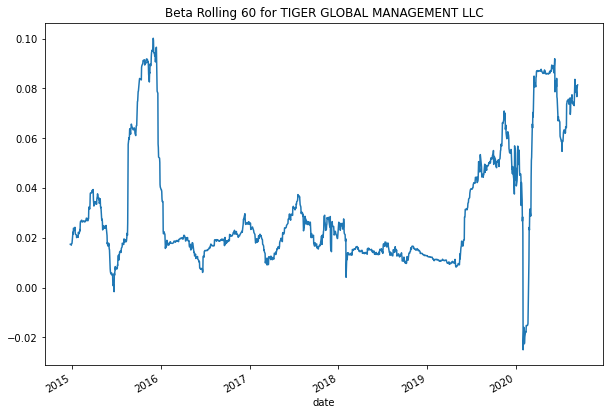

In [25]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
portfolio_2_beta_rolling_60.plot(
    title=f'Beta Rolling 60 for {portfolio_2}',
    figsize=(10,7)
)

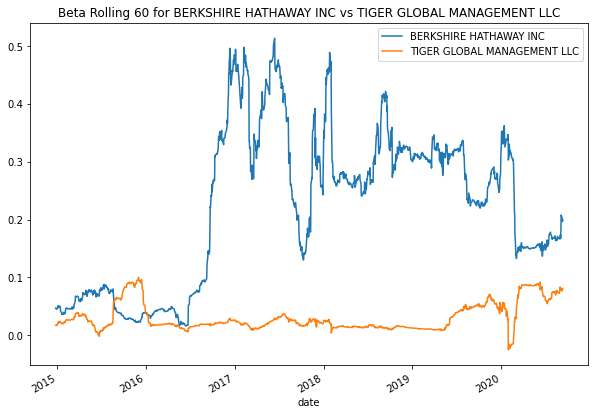

In [26]:
# overlay Beta plots of both selected portfolios to make it easier to visualize
ax = portfolio_1_beta_rolling_60.plot(
    title=f'Beta Rolling 60 for {portfolio_1} vs {portfolio_2}',
    figsize=(10,7)
)
portfolio_2_beta_rolling_60.plot(ax=ax)
ax.legend([portfolio_1,portfolio_2])

In [27]:
# For the analysis, calculating average 60 day Beta of the two selected funds
print(f"{portfolio_1} had an average 60 day beta of {portfolio_1_beta_rolling_60.mean():.8f}")
print(f"{portfolio_2} had an average 60 day beta of {portfolio_2_beta_rolling_60.mean():.8f}")


BERKSHIRE HATHAWAY INC had an average 60 day beta of 0.22149861
TIGER GLOBAL MANAGEMENT LLC had an average 60 day beta of 0.03093001


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** 

Refering to the plot labeled *Beta Rolling 60 for BERKSHIRE HATHAWAY INC vs TIGER GLOBAL MANAGEMENT LLC*, one can observe that 

* During the time period ranging mid 2016 onwards, the BERKSHIRE HATHAWAY INC fund portfolio had a *beta* value above 0.1, typicallt around 0.3 - 0.4, but with spikes nearing 0.5 and lows around 0.2
* During the same time period, mid 2016 onwards, the TIGER GLOBAL MANAGEMENT LLC fund portfolio typically had a *beta* below 0.1

Therefore, the BERKSHIRE HATHAWAY INC fund portfolio was significantly more sensitive to movements in the S&P 500 than the Tiger GLOBAL MANAGEMENT LLC fund portfolio during the time period ranging from mis 2016 through the end of 2020.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** 

To recap the analysis of the selected funds:

| Fund | Cumulative Return | Sharpe Ratio | average 60 day Beta |
|------|-------------------|------|------|
| BERKSHIRE HATHAWAY INC | 1.23662 | 0.717512 | 0.22149861 |
| TIGER GLOBAL MANAGEMENT LLC | 1.055081 | 0.579002 | 0.03093001 |

Although the BERKSHIRE HATHAWAY INC fund portfolio is more sensitive to movements in the S&P 500 than the TIGER GLOBAL MANAGEMENT LLC fund portfolio, it has a higher Sharpe Ratio, indicating that the BERKSHIRE HATHAWAY INC fund portfolio has better returns for similar risk than the TIGER GLOBAL MANAGEMENT LLC fund portfolio.  This was corroborated by the higher cumulative returns where the BERKSHIRE HATHAWAY INC fund portfolio returned 23.7% compared to a return of 5.51% for the TIGER GLOBAL MANAGEMENT LLC fund portfolio.  

I therefore recommend including the BERKSHIRE HATHAWAY INC fund portfolio in our fund offerings.


---